# CEE 690, Lecture 8 Code Examples

This course will make use of notebook style coding.  Notebooks are incredibly useful tools both for teaching and for disseminating data anlysis.

Over the course of this lecture, we will be going through examples of how to use the various tools that we've discussed in the last lecture.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [55]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [56]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [57]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [58]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "08"

In [59]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [60]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

# Load in and look at a dataset
We will look at the well-known "Breast Cancer Dataset"
Additional details on the dataset can be found at
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [62]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [63]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [64]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### We can use DataFrames from Pandas
These DataFrames operate in much the same way as a DataFrame in R, so they may seem familiar for those of you used to R.  The major package to do this type of analysis is Pandas.

Scikit-learn is designed so that it can take either numpy arrays or dataframes.

In [65]:
import pandas as pd

In [66]:
X=pd.DataFrame(cancer['data'])
X.columns=cancer.feature_names

In [67]:
X[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### What happens when we vary the decision threshold?
Here, we will first split the dataset into a training and a validation dataset, and then train a KNeighborsClassifier on it.  We will then demonstrate what happens when we vary the decision threshold.

In [68]:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import linear_model

In [69]:
# First, we split the dataset into a training and a validation dataset.
# To initially make the problem a bit more uncertain, we are going to limit
# ourselves to a subset of features.  This is NOT something that you want to
# do in practice, but is helpful for illustrating how probabilities change.
from sklearn import feature_selection
sorted_in_quality=np.argsort(feature_selection.f_regression(X.values,cancer['target']))[0]
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(X.values[:,sorted_in_quality[:15]],cancer['target'],random_state=42)

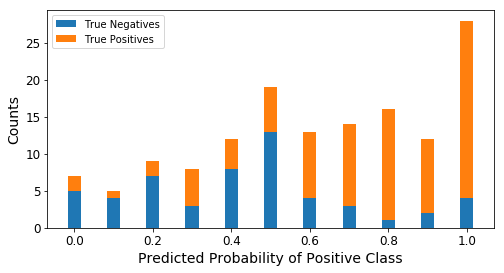

In [70]:
# Next, we want to apply a kNN classifier to the data.  Here,
# we define the classifier and apply it to the training data.
cls=neighbors.KNeighborsClassifier(n_neighbors=10)
cls.fit(X_train,y_train)
# We then predict the probabilities on the validation dataset.
# The probability command returns probability of 0 and the
# probability of 1, so we only need to keep the 1.  For a
# binary classification problem, this is redundant, but is
# very helpful for multiple classes.
p01=cls.predict_proba(X_valid[y_valid==0])[:,1]
p11=cls.predict_proba(X_valid[y_valid==1])[:,1]
fig=plt.figure(figsize=[8,4])
n_bins=31
plt.hist([p01,p11],bins=n_bins,stacked=True,range=[0-.5/(n_bins-1),1+.5/(n_bins-1)])
plt.legend(['True Negatives','True Positives '])
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


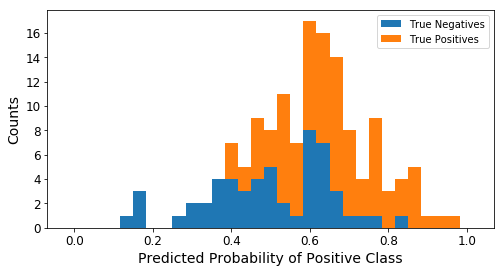

In [71]:
# Same thing, but with logistic regression
cls=linear_model.LogisticRegression(solver='sag')
cls.fit(X_train,y_train)
p01=cls.predict_proba(X_valid[y_valid==0])[:,1]
p11=cls.predict_proba(X_valid[y_valid==1])[:,1]
fig=plt.figure(figsize=[8,4])
n_bins=31
plt.hist([p01,p11],bins=n_bins,stacked=True,range=[0-.5/(n_bins-1),1+.5/(n_bins-1)])
plt.legend(['True Negatives','True Positives '])
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Counts')
plt.show()

### Now we want to visualize the confusion matrix

In [72]:
# this is a complicated function that is useful for showing confusion matricies.  
# feel free to use it, but we're not going to go through how it works.
from sklearn import metrics
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    ##
    modified by dec18

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig=plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+', Accuracy={:0.4f}'.format(accuracy))
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)
    
    cmr=cm;
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cmr.max() / 1.5 if normalize else cmr.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cmr[i, j] > thresh else "black",fontsize=18)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cmr[i, j] > thresh else "black",fontsize=18)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    return fig

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


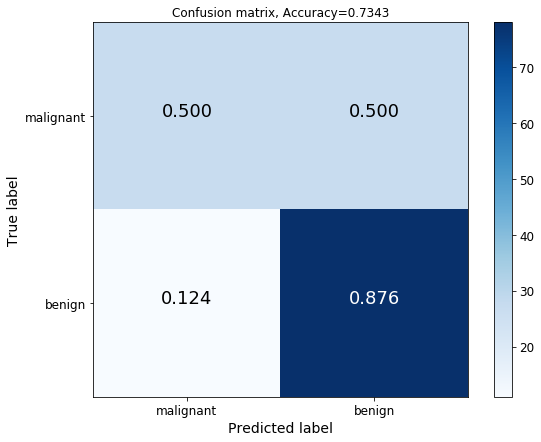

In [73]:
# Here we can visualize the confusion matrix that we showed before.
decision_threshold=.5
# First, we fit a classifier
cls=linear_model.LogisticRegression(solver='sag')
cls.fit(X_train,y_train)
# Extract the predicted probabilites on the validation dataset
predicted_probabilities=cls.predict(X_valid)
# Convert the predicted probabilities to the binary case
binary_prediction=cls.predict_proba(X_valid)[:,1]>decision_threshold
# Show the confusion matrix
cm = metrics.confusion_matrix(y_valid, binary_prediction)
fig=plot_confusion_matrix(cm,cancer['target_names'])

### Visualizing the ROC curve
The ROC curve can require some special code to construct.  It's a useful exercise to write code to sweep over the possible decision threshold and make this yourself, but we're going to use the built-in tools from scikit-learn.

In [74]:
# As before, get probabilities
pred=cls.predict_proba(X_valid)[:,1]
# Using sklearn to get the false positive rate (fpr) and 
# true positive rate (tpr) for all possible thresholds.
fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
# We can calculate the AUC by integrating the curve
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.764669163545568


<Figure size 432x288 with 0 Axes>

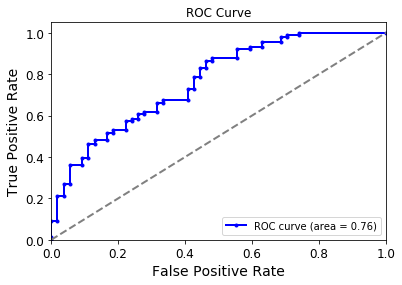

In [75]:
#visualizing the ROC curve.
plt.figure()
lw = 2
fig=plt.figure(figsize=[6,4])
plt.plot(fpr, tpr, '.-',color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### This can be a very useful way to compare models visually.

In [76]:
from sklearn import linear_model, neighbors,tree

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

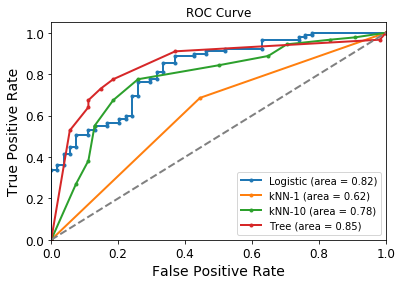

In [77]:
models_to_compare=[linear_model.LogisticRegression(),\
                  neighbors.KNeighborsClassifier(n_neighbors=1),\
                  neighbors.KNeighborsClassifier(n_neighbors=10),\
                  tree.DecisionTreeClassifier(max_depth=3)]
model_names=['Logistic','kNN-1','kNN-10','Tree']
plt.figure()
lw = 2
fig=plt.figure(figsize=[6,4])
# define a loop over all models, and plot their ROC curves on the same figure
for cls,name in zip(models_to_compare,model_names):
    cls.fit(X_train,y_train)
    pred=cls.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, '.-',
         lw=lw, label=name+' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()    


## Rescaling matters!
scikit-learn has many functions for rescaling the data built in.  They are very helpful tools to facilitate quick processing of the data.

We will quickly introduce pipelines as well, which allows us to chain techniques together into a data processing and prediction pipeline.

In [78]:
from sklearn import preprocessing

First predictions _without_ scaling.

In [79]:

cls=neighbors.KNeighborsClassifier(n_neighbors=10)
cls.fit(X_train,y_train)
# As before, get probabilities
pred=cls.predict_proba(X_valid)[:,1]
# Using sklearn to get the false positive rate (fpr) and 
# true positive rate (tpr) for all possible thresholds.
fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
# We can calculate the AUC by integrating the curve
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7795464003329171


Now we want to include predictions __with__ scaling.

In [80]:
std_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler()
maxabs_scaler = preprocessing.MaxAbsScaler()

These types of preprocesing functions:

`scaler.fit()`  
This function "fits" the transform, much in the same way that our classifier fits the model.  Essentially, it learns the underlying parameters to be used in the transform (i.e. the mean and standard deviation for each feature), but does not apply the transform.

`scaler.transform()`
This function transforms the data with the previously learned settings.  This applies the previously fit transform, which is helpful when applying to data (i.e. transform the validation or test set with the transform learned on the training data).

`scaler.fit_transform()`  
This function simply combines `fit` and `transform` to both learn the rescaling and apply it at the same time.

Here we will first work with the `StandardScaler` function.

In [81]:
# create a new classifier to work with the transformed data.
cls_1=neighbors.KNeighborsClassifier(n_neighbors=10)
# Learn and apply the transform on the training data:
std_scaler.fit(X_train) # only needs X as an input. 
# y can be passed as well, but it doesn't do anything.
X_train_rescaled=std_scaler.transform(X_train)
# Now fit our new classifier with the rescaled data
cls_1.fit(X_train_rescaled,y_train)
# As before, get probabilities
pred_1=cls_1.predict_proba(X_valid)[:,1]
# Using sklearn to get the false positive rate (fpr) and 
# true positive rate (tpr) for all possible thresholds.
fpr_1, tpr_1, _ = metrics.roc_curve(y_valid, pred_1)
# We can calculate the AUC by integrating the curve
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
print(roc_auc_1)

0.45328755722014147


Wait... that's _much_ worse.  We must of made a mistake.

We forgot to transform the _validation_ dataset.  I made this error on purpose because it's a very common mistake.  Let's fix it below.

In [82]:
# create a new classifier to work with the transformed data.
cls_1=neighbors.KNeighborsClassifier(n_neighbors=10)
# Learn and apply the transform on the training data:
std_scaler.fit(X_train) # only needs X as an input. 
# y can be passed as well, but it doesn't do anything.
X_train_rescaled=std_scaler.transform(X_train)
# Now fit our new classifier with the rescaled data
cls_1.fit(X_train_rescaled,y_train)
# As before, get probabilities
X_valid_rescaled=std_scaler.transform(X_valid)
pred_1=cls_1.predict_proba(X_valid_rescaled)[:,1]
# Using sklearn to get the false positive rate (fpr) and 
# true positive rate (tpr) for all possible thresholds.
fpr_1, tpr_1, _ = metrics.roc_curve(y_valid, pred_1)
# We can calculate the AUC by integrating the curve
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
print(roc_auc_1)

0.9424677486475239


Let's plot our AUC curves again:

<Figure size 432x288 with 0 Axes>

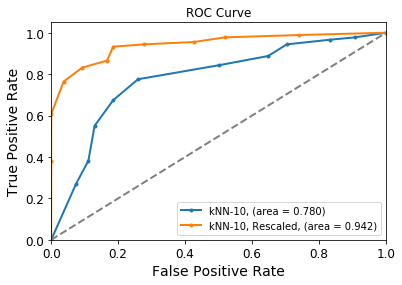

In [83]:
#visualizing the ROC curve.
plt.figure()
lw = 2
fig=plt.figure(figsize=[6,4])
plt.plot(fpr, tpr, '.-',
         lw=lw, label='kNN-10, (area = %0.3f)' % roc_auc)
plt.plot(fpr_1, tpr_1, '.-',
         lw=lw, label='kNN-10, Rescaled, (area = %0.3f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

As we add multiple steps of normalization, feature selection, classification, tuning, etc., things can get _complicated_!

We can write the operations sequentially, as we did above with:
```
std_scaler.fit(X_train) 
X_train_rescaled=std_scaler.transform(X_train)
cls_1.fit(X_train_rescaled,y_train)
```
But that gets cumbersome as we see more and more operations, and is easy to mess up the code (as we did above too!).

Fortunately, we can define a `pipeline` object that wraps these steps together into a single object that then behaves like a classifier.


In [84]:
from sklearn import pipeline

In [85]:
# create a new classifier to work with the transformed data.
scaler=preprocessing.StandardScaler()
cls=neighbors.KNeighborsClassifier(n_neighbors=10)
# now we construct a pipeline
pipe=pipeline.Pipeline([('scaler',scaler),('cls',cls)])
# Now we don't need to rescale prior to the pipeline, it is all included.
pipe.fit(X_train,y_train)
# As before, get probabilities
pred=pipe.predict_proba(X_valid)[:,1]
# Using sklearn to get the false positive rate (fpr) and 
# true positive rate (tpr) for all possible thresholds.
fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
# We can calculate the AUC by integrating the curve
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9424677486475239


Then we can use AUCs to compare pipelines.

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0

<Figure size 432x288 with 0 Axes>

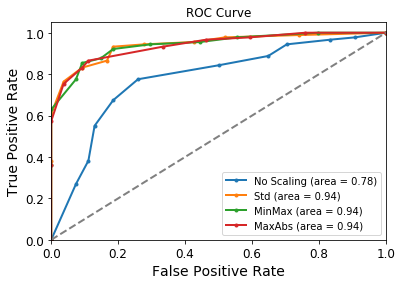

In [86]:
cls=neighbors.KNeighborsClassifier(n_neighbors=10)
models_to_compare=[cls,\
                  pipeline.Pipeline([('scaler',std_scaler),('cls',cls)]),\
                  pipeline.Pipeline([('scaler',minmax_scaler),('cls',cls)]),\
                  pipeline.Pipeline([('scaler',maxabs_scaler),('cls',cls)])]
model_names=['No Scaling','Std','MinMax','MaxAbs']
plt.figure()
lw = 2
fig=plt.figure(figsize=[6,4])
# define a loop over all models, and plot their ROC curves on the same figure
for cls,name in zip(models_to_compare,model_names):
    cls.fit(X_train,y_train)
    pred=cls.predict_proba(X_valid)[:,1]
    print(y_valid)
    fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, '.-',
         lw=lw, label=name+' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()    


As before, we try many different settings to evaluate what the best model is, but we can do it in the context of the pipeline.

In [87]:
    pipe=pipeline.Pipeline([('scaler',std_scaler),('cls',cls)])
    pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('cls', Pipeline(memory=None,
     steps=[('scaler', MaxAbsScaler(copy=True)), ('cls', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'))]))])

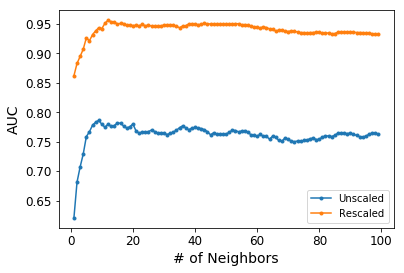

In [88]:
aucs_no_scale=[]
aucs_scaled=[]
for k in range(1,100):
    cls=neighbors.KNeighborsClassifier(n_neighbors=k)
    pipe=pipeline.Pipeline([('scaler',std_scaler),('cls',cls)])
    # without scaling
    cls.fit(X_train,y_train)
    pred=cls.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
    roc_auc = metrics.auc(fpr, tpr)
    aucs_no_scale.append(roc_auc)
    # with scaling
    pipe.fit(X_train,y_train)
    pred=pipe.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_valid, pred)
    roc_auc = metrics.auc(fpr, tpr)
    aucs_scaled.append(roc_auc)
fig=plt.figure(figsize=[6,4])
plt.plot(np.arange(1,100),aucs_no_scale,'.-',label='Unscaled')
plt.plot(np.arange(1,100),aucs_scaled,'.-',label='Rescaled')
plt.xlabel("# of Neighbors")
plt.ylabel('AUC')
plt.legend()
plt.show()

# Penalized regression

We're going to use a different example dataset to demonstrate penalized regression.

This is a popular dataset on diabetes. Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [89]:
from sklearn import datasets
diabetes=datasets.load_diabetes(return_X_y=False)
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(diabetes['data'],diabetes['target'],random_state=42)

In [90]:
# Import relevant functions
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [91]:
# Compute paths

n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)

coefs = []
mse_valid=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a)
    ridge.fit(X_train[:100,:], y_train[:100])
    coefs.append(ridge.coef_)
    mse_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid)))

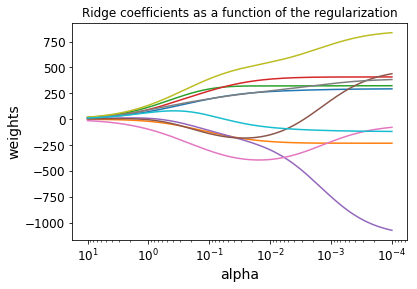

In [92]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [93]:
# Compute paths

n_alphas = 200
alphas = np.logspace(-4, .5, n_alphas)

coefs = []
mse_valid=[]
for a in alphas:
    ridge=linear_model.Lasso(alpha=a)
    ridge.fit(X_train[:100,:], y_train[:100])
    coefs.append(ridge.coef_)
    mse_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid)))

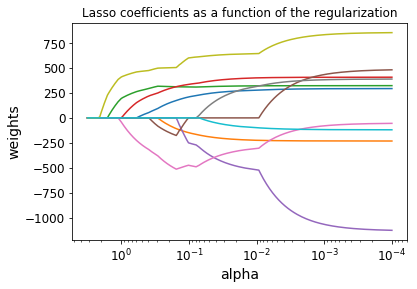

In [94]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

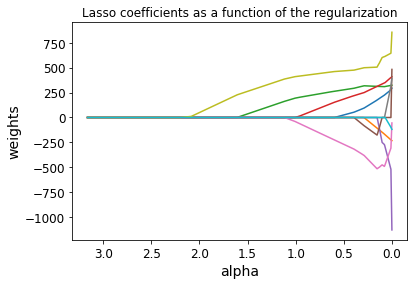

In [95]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, coefs)
ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Note that I haven't done model selection here!  That will be left as a homework exercise.

## Trees

This visualization requires the install of the "graphviz" python package.  _This isn't required for any assignment in the class_, but is frequently used in visualizations and can be fun to play around with.

For those of inclined, this should be easy to install on a personal machine. If you use a mac/linux, then the command in a terminal is just:
conda install python-graphviz  
To help with saving pdfs:  
conda install pydot

Alternatively, this can be install via Anaconda Navigator (which was installed if you used the anaconda python installer).
Go to environments (you likely only have "root"), click on your environment, and you can then search for graphviz in the "available packages."


In [97]:
import graphviz, pylab
from sklearn.tree import export_graphviz
from sklearn import datasets
cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X,y,random_state=42)


In [99]:
# will not go through this code, will be used to visualize trees.
# to use, requires a 'tmp' directory.
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir('tmp')):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir('tmp')
# visualization function
def visualize_tree(tree):
    export_graphviz(tree, out_file="tmp/tree.dot", class_names=["malignant", "benign"],
                    feature_names=cancer.feature_names, impurity=False, filled=True)
    with open("tmp/tree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [101]:
# This function is useful to save pdfs of the tree for inclusion in reports.
import pydot
def save_tree(output_file_name='tree.pdf',loc='tmp/',in_file='tmp/tree.dot'):
    (graph,) = pydot.graph_from_dot_file(in_file)
    graph.write_pdf(loc+output_file_name)

In [102]:
from sklearn.tree import DecisionTreeClassifier

First, a decision tree with a single decision node

In [104]:
tree1 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=1,max_features=None)
tree1=tree1.fit(X_train,y_train)
visualize_tree(tree1)
save_tree('split_1.pdf')

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

FileNotFoundError: [Errno 2] "dot" not found in path.

In [105]:
tree2 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=2,max_features=None)
tree2=tree2.fit(X_train,y_train)
visualize_tree(tree2)
save_tree('split_2.pdf')

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

FileNotFoundError: [Errno 2] "dot" not found in path.

In [51]:
tree3 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=3,max_features=None)
tree3=tree3.fit(X_train,y_train)
visualize_tree(tree3)
save_tree('split_3.pdf')

NameError: name 'export_graphviz' is not defined

In [52]:
from sklearn.metrics import roc_auc_score
yhat=tree1.predict_proba(X_valid)
print('The first tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=tree2.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=tree3.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))

ValueError: multiclass format is not supported

## Feature Selection
Final topic is feature seleciton, which we will discuss in the context of a slightly more difficult dataset (the first breast cancer dataset is relatively easy).

In [106]:
from sklearn.datasets import fetch_covtype
# we're predict the dominant species in a forest

In [107]:
forest_data=fetch_covtype()
print('finished')

In [108]:
print(forest_data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <http://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be do

In [ ]:
# To not worry about computational time, we're only going to use 4,000 samples
np.random.seed(42)
rand_perm=np.random.permutation(581012)
# screen low variance features
screen=feature_selection.VarianceThreshold(.01)
X=screen.fit_transform(forest_data.data[rand_perm[:4000]])
y=forest_data.target[rand_perm[:4000]]

In [ ]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

In [ ]:
from sklearn import feature_selection

In [ ]:
n_neighbors=10
n_feature_set=np.arange(1,30)
acc_uni=[]
acc_uni_scaling=[]
for k in n_feature_set:
    cls=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    scaler=preprocessing.StandardScaler()
    uni=feature_selection.SelectKBest(k=k)
    pipe =pipeline.Pipeline([('fs',uni),('cls',cls)])
    pipe.fit(X_train,y_train)
    acc=metrics.accuracy_score(y_valid,pipe.predict(X_valid))
    acc_uni.append(acc)
    # with rescaling
    pipe =pipeline.Pipeline([('fs',uni),('scal',scaler),('cls',cls)])
    pipe.fit(X_train,y_train)
    acc=metrics.accuracy_score(y_valid,pipe.predict(X_valid))
    acc_uni_scaling.append(acc)

In [ ]:
fig=plt.figure(figsize=[6,4])
plt.plot(n_feature_set,acc_uni,'.--b',label='No Scaling')
plt.plot(n_feature_set,acc_uni_scaling,'.--r',label='Standard Scaling')
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.legend()
plt.show()

### Sequential Feature Selection
We won't be going through this code in too much detail, and it's not heavily commented.

In [ ]:
#
n_neighbors=10
max_features=10
n_features=X.shape[1]
acc_seq=[]

feature_set=np.array([])
cls=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
for iter in range(0,max_features):
    old_feature_set=feature_set
    acc_int=np.zeros([n_features])
    for k in range(0,n_features):
        if k in feature_set:
            acc_int[k]=0
            continue
        proposed_feature_set=np.concatenate([old_feature_set,[k]])
        acc_int[k]=np.mean(\
                           model_selection.cross_val_score(\
                           cls,X[:,np.array(proposed_feature_set,dtype=np.int)].\
                           reshape(-1,len(proposed_feature_set)),y,cv=5))
    k_to_add=np.argmax(acc_int)
    feature_set=np.concatenate([feature_set,[k_to_add]])
    print(feature_set)
    acc_seq.append(acc_int[k_to_add])
    print(acc_seq)

In [ ]:
fig=plt.figure(figsize=[8,5])
plt.plot(n_feature_set,acc_uni,'.-',lw=2,ms=10,label='Univariate')
plt.plot(np.arange(0,10)+1,acc_seq,'.-',lw=2,ms=10,label='Sequential')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### With feature normalization, too

In [ ]:
#
n_neighbors=10
n_feature_set=np.arange(1,30)
acc_uni_scaling=[]
for k in n_feature_set:
    cls=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    scaler=preprocessing.StandardScaler()
    screen=feature_selection.VarianceThreshold(.001)
    uni=feature_selection.SelectKBest(k=k)
    pipe =pipeline.Pipeline([('screen',screen),('scaler',scaler),('fs',uni),('cls',cls)])
    acc=np.mean(model_selection.cross_val_score(pipe,X,y,cv=5))
    acc_uni_scaling.append(acc)

In [ ]:
#
n_neighbors=10
max_features=n_features
acc_seq_scal=[]

feature_set=np.array([])
cls=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
scaler=preprocessing.StandardScaler()
pipe=pipeline.Pipeline([('scaler',scaler),('cls',cls)])
for iter in range(0,max_features):
    old_feature_set=feature_set
    acc_int=np.zeros(n_features)
    for k in range(0,n_features):
        if k in feature_set:
            acc_int[k]=0
            continue
        proposed_feature_set=np.concatenate([old_feature_set,[k]])
        acc_int[k]=np.mean(\
                           model_selection.cross_val_score(\
                           pipe,X[:,np.array(proposed_feature_set,dtype=np.int)].\
                           reshape(-1,len(proposed_feature_set)),y,cv=5))
    k_to_add=np.argmax(acc_int)
    feature_set=np.concatenate([feature_set,[k_to_add]])
    print(feature_set)
    acc_seq_scal.append(acc_int[k_to_add])
    print(acc_seq_scal)

In [ ]:
fig=plt.figure(figsize=[8,5])
plt.plot(n_feature_set,acc_uni,'.-',lw=2,ms=10,label='Univariate')
plt.plot(n_feature_set,acc_uni_scaling,'.-',lw=2,ms=10,label='Univariate-Scaling')
plt.plot(np.arange(0,10)+1,acc_seq,'.-',lw=2,ms=10,label='Sequential')
plt.plot(np.arange(0,max_features)+1,acc_seq_scal,'.-',lw=2,ms=10,label='Sequential-Scaling')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
